# **Import Library**

In [1]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import optimizers
from keras.models import Model
from keras import backend as K
from keras.layers import Input, Dense, Lambda, Flatten

In [2]:
print(tf.__version__)
print(keras.__version__)

2.18.0
3.6.0


# **Import Dataset**

In [3]:
# Load all dataset to Pandas DataFrame
df_user=pd.read_csv('users-details-2023.csv')
df_anime=pd.read_csv('anime-dataset-2023.csv')
df_score=pd.read_csv('users-score-2023.csv')

In [4]:
# data anime
print("Contoh Baris Terakhir, Panjang Dataset:",df_anime.shape)

print(df_anime.tail(10))

Contoh Baris Terakhir, Panjang Dataset: (24905, 24)
       anime_id                        Name                    English name  \
24895     55726                Die, Please!                         UNKNOWN   
24896     55727                        Miru                         UNKNOWN   
24897     55728  Wo Mengjian ni Mengjian wo  A Dream Where You Dreamt of Me   
24898     55729                    Thailand                         UNKNOWN   
24899     55730                      Energy                         UNKNOWN   
24900     55731                 Wu Nao Monu                         UNKNOWN   
24901     55732         Bu Xing Si: Yuan Qi                     Blader Soul   
24902     55733                 Di Yi Xulie                 The First Order   
24903     55734    Bokura no Saishuu Sensou                         UNKNOWN   
24904     55735              Shijuuku Nichi                         UNKNOWN   

      Other name    Score                              Genres  \
24895  부탁이니 죽

In [5]:
# data user details

# Tentukan jumlah total baris yang ingin Anda baca (10%)
total_rows_user = 731290
sample_size_user = int(total_rows_user * 0.006773)

# Membaca hanya 10% dari data
df_user=pd.read_csv('users-details-2023.csv', nrows=sample_size_user)

# Tampilkan informasi mengenai dataframe yang dibaca
print(df_user.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4953 entries, 0 to 4952
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Mal ID            4953 non-null   int64  
 1   Username          4953 non-null   object 
 2   Gender            2564 non-null   object 
 3   Birthday          1696 non-null   object 
 4   Location          1792 non-null   object 
 5   Joined            4953 non-null   object 
 6   Days Watched      4953 non-null   float64
 7   Mean Score        4953 non-null   float64
 8   Watching          4953 non-null   float64
 9   Completed         4953 non-null   float64
 10  On Hold           4953 non-null   float64
 11  Dropped           4953 non-null   float64
 12  Plan to Watch     4953 non-null   float64
 13  Total Entries     4953 non-null   float64
 14  Rewatched         4953 non-null   float64
 15  Episodes Watched  4953 non-null   float64
dtypes: float64(10), int64(1), object(5)
memory

In [6]:
# Tampilkan baris terakhir dari dataframe
print("Contoh Baris Terakhir, Panjang Dataset:",df_user.shape)

print(df_user.tail(50))

Contoh Baris Terakhir, Panjang Dataset: (4953, 16)
      Mal ID          Username  Gender                   Birthday  \
4903    6018        Salsanadia  Female                        NaN   
4904    6019            polina     NaN                        NaN   
4905    6020              Thud     NaN                        NaN   
4906    6021            Shinja     NaN                        NaN   
4907    6022       malaysiapop    Male  1981-07-05T00:00:00+00:00   
4908    6023          Angel407     NaN                        NaN   
4909    6024             sekoj     NaN                        NaN   
4910    6025           mycroft    Male  1957-08-11T00:00:00+00:00   
4911    6026              ady6     NaN                        NaN   
4912    6027            hokage     NaN                        NaN   
4913    6028    goodevilgenius    Male  1982-03-28T00:00:00+00:00   
4914    6029      charcoalwing     NaN                        NaN   
4915    6030      realanimefan    Male  1991-07-26T0

In [7]:
# data user score rating

# Tentukan jumlah total baris yang ingin Anda baca (10%)
total_rows_score = 24325191
sample_size_score = int(total_rows_score * 0.015)

# Membaca hanya 10% dari data
df_score = pd.read_csv('users-score-2023.csv', nrows=sample_size_score)

# Tampilkan informasi mengenai dataframe yang dibaca
print(df_score.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364877 entries, 0 to 364876
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      364877 non-null  int64 
 1   Username     364877 non-null  object
 2   anime_id     364877 non-null  int64 
 3   Anime Title  364877 non-null  object
 4   rating       364877 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 13.9+ MB
None


In [8]:
# Tampilkan baris terakhir dari dataframe
print("Contoh Baris Terakhir, Panjang Dataset:",df_score.shape)

print(df_score.tail(10))

Contoh Baris Terakhir, Panjang Dataset: (364877, 5)
        user_id Username  anime_id                    Anime Title  rating
364867     4444    dared      1303                  The Animatrix      10
364868     4444    dared      2236          Toki wo Kakeru Shoujo       9
364869     4444    dared       759               Tokyo Godfathers      10
364870     4444    dared      1980             Trava: Fist Planet       9
364871     4444    dared         7             Witch Hunter Robin       6
364872     4444    dared      1195               Zero no Tsukaima       5
364873     4444    dared      3228  Zoku Sayonara Zetsubou Sensei       9
364874     4444    dared       387                 Haibane Renmei       6
364875     4444    dared       777              Hellsing Ultimate       5
364876     4444    dared       483           Kurau Phantom Memory       5


In [9]:
# Data Final

# Menampilkan data dan jumlah baris untuk df_user
print("users_data.csv")
display(df_user.sample(3))
print(f"Jumlah data: {len(df_user)}\n")

# Menampilkan data dan jumlah baris untuk df_score
print("anime_rating.csv")
display(df_score.sample(3))
print(f"Jumlah data: {len(df_score)}\n")

# Menampilkan data dan jumlah baris untuk df_anime
print("anime_2023.csv")
display(df_anime.sample(3))
print(f"Jumlah data: {len(df_anime)}")

users_data.csv


,Mal ID,Username,Gender,Birthday,Location,Joined,Days Watched,Mean Score,Watching,Completed,On Hold,Dropped,Plan to Watch,Total Entries,Rewatched,Episodes Watched
4891,6006,ineser,Male,1985-04-14T00:00:00+00:00,"Kuching, Malaysia",2007-06-20T00:00:00+00:00,207.4,8.25,7.0,807.0,18.0,11.0,0.0,843.0,0.0,12209.0
3744,4843,MeweMe,NaN,NaN,NaN,2007-05-28T00:00:00+00:00,0.2,0.00,0.0,1.0,0.0,0.0,0.0,1.0,0.0,12.0
1908,2981,fat_man_laughing,Male,1993-04-30T00:00:00+00:00,Israel,2007-04-10T00:00:00+00:00,96.1,8.00,0.0,234.0,3.0,12.0,4.0,253.0,0.0,5646.0


Jumlah data: 4953

anime_rating.csv


,user_id,Username,anime_id,Anime Title,rating
280034,3449,koneko-chan,21407,Happiness Charge Precure!,5
106715,1514,wraith,2472,Naruto: Shippuuden Movie 1,7
182986,2437,chibihien,2403,Kodomo no Jikan (TV),7


Jumlah data: 364877

anime_2023.csv


,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
14994,38748,"""Tokyo""",Tokyo,「とうきょう」- Tokyo,3.99,Avant Garde,A short film spelling Tokyo in hiragana.,Movie,1.0,"Oct 5, 2017",...,UNKNOWN,Original,1 min,G - All Ages,12611.0,13609,0,412.0,745,https://cdn.myanimelist.net/images/anime/1109/...
12007,33775,Soul Buster,Soul Buster,侍霊演武[ソウルバスター],5.75,Action,"Keishuu, China.\n\nThe history books say that ...",TV,12.0,"Oct 4, 2016 to Dec 11, 2016",...,Pierrot,Manga,13 min per ep,PG-13 - Teens 13 or older,9895.0,4450,14,7156.0,21198,https://cdn.myanimelist.net/images/anime/3/822...
4140,5476,Fushigi na Melmo,Marvelous Melmo,ふしぎなメルモ,6.01,UNKNOWN,After losing her mother in a tragic car accide...,TV,26.0,"Oct 3, 1971 to Mar 26, 1972",...,Tezuka Productions,Manga,24 min per ep,PG - Children,8804.0,11237,2,369.0,1629,https://cdn.myanimelist.net/images/anime/11/11...


Jumlah data: 24905


# **Data Assessment**


## **`df_user`**

In [10]:
df_user.sample(5)

,Mal ID,Username,Gender,Birthday,Location,Joined,Days Watched,Mean Score,Watching,Completed,On Hold,Dropped,Plan to Watch,Total Entries,Rewatched,Episodes Watched
2385,3464,bouth,NaN,NaN,NaN,2007-04-21T00:00:00+00:00,83.4,8.64,1.0,100.0,6.0,0.0,7.0,114.0,35.0,4893.0
4690,5804,carl,Male,1990-01-13T00:00:00+00:00,"Tsawwassen, BC",2007-06-16T00:00:00+00:00,15.1,0.00,4.0,66.0,10.0,9.0,7.0,96.0,0.0,851.0
1914,2987,MiwaMiwa,NaN,NaN,NaN,2007-04-10T00:00:00+00:00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2328,3407,BUBAmail,NaN,NaN,NaN,2007-04-20T00:00:00+00:00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
971,1969,Ragnao,Male,1990-12-15T00:00:00+00:00,South Florida,2007-02-11T00:00:00+00:00,68.6,8.23,3.0,138.0,19.0,10.0,6.0,176.0,0.0,4032.0


In [11]:
# View variable information in users data
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4953 entries, 0 to 4952
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Mal ID            4953 non-null   int64  
 1   Username          4953 non-null   object 
 2   Gender            2564 non-null   object 
 3   Birthday          1696 non-null   object 
 4   Location          1792 non-null   object 
 5   Joined            4953 non-null   object 
 6   Days Watched      4953 non-null   float64
 7   Mean Score        4953 non-null   float64
 8   Watching          4953 non-null   float64
 9   Completed         4953 non-null   float64
 10  On Hold           4953 non-null   float64
 11  Dropped           4953 non-null   float64
 12  Plan to Watch     4953 non-null   float64
 13  Total Entries     4953 non-null   float64
 14  Rewatched         4953 non-null   float64
 15  Episodes Watched  4953 non-null   float64
dtypes: float64(10), int64(1), object(5)
memory

In [12]:
# View the number of unique data in each users data variable
print("Number of unique data:")
print(df_user.nunique())

Number of unique data:
Mal ID              4953
Username            4953
Gender                 3
Birthday            1417
Location            1165
Joined               435
Days Watched        1538
Mean Score           424
Watching             141
Completed            748
On Hold              156
Dropped              191
Plan to Watch        314
Total Entries        934
Rewatched            184
Episodes Watched    3052
dtype: int64


In [13]:
# See the number of empty data in each users data variable
print("Number of empty data:")
print(df_user.isna().sum())

Number of empty data:
Mal ID                 0
Username               0
Gender              2389
Birthday            3257
Location            3161
Joined                 0
Days Watched           0
Mean Score             0
Watching               0
Completed              0
On Hold                0
Dropped                0
Plan to Watch          0
Total Entries          0
Rewatched              0
Episodes Watched       0
dtype: int64


In [14]:
# View the number of duplicate data in each row of seller data
print("Number of duplicate rows:", end=" ")
print(df_user.duplicated().sum())

Number of duplicate rows: 0


In [15]:
# View descriptive parameter data from each numeric variable of seller data
df_user.describe()

,Mal ID,Days Watched,Mean Score,Watching,Completed,On Hold,Dropped,Plan to Watch,Total Entries,Rewatched,Episodes Watched
count,4953.000000,4953.000000,4953.000000,4953.000000,4953.000000,4953.000000,4953.000000,4953.000000,4953.000000,4953.000000,4953.000000
mean,3484.836261,51.789320,6.206691,10.317182,147.385019,10.389057,13.496063,33.047850,214.635776,12.399556,3136.131435
std,1566.225024,80.271577,3.348794,28.189680,278.223627,26.458335,38.924636,160.289143,395.595804,64.679592,4988.358411
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2290.000000,2.200000,6.390000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,129.000000
50%,3557.000000,25.200000,7.530000,3.000000,47.000000,1.000000,1.000000,2.000000,74.000000,0.000000,1496.000000
75%,4813.000000,69.900000,8.270000,10.000000,173.000000,9.000000,10.000000,21.000000,263.000000,6.000000,4213.000000
max,6068.000000,2410.700000,10.000000,830.000000,5212.000000,384.000000,760.000000,6440.000000,8423.000000,3498.000000,147816.000000


## **`df_anime`**

In [16]:
df_anime.sample(3)

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
6169,10373,Soul Link Picture Drama,UNKNOWN,Soul Link,5.47,"Romance, Sci-Fi",Main characters reminiscing about their past.,Special,3.0,"Jul 21, 2006 to Sep 22, 2006",...,UNKNOWN,Visual novel,4 min per ep,PG-13 - Teens 13 or older,10869.0,12283,0,285.0,1120,https://cdn.myanimelist.net/images/anime/8/285...
5461,8676,Amagami SS,Amagami SS,アマガミSS,7.29,Romance,"Two years ago, Junichi Tachibana had a date on...",TV,25.0,"Jul 2, 2010 to Dec 24, 2010",...,AIC,Visual novel,24 min per ep,PG-13 - Teens 13 or older,2544.0,586,2217,155934.0,369583,https://cdn.myanimelist.net/images/anime/10/78...
2409,2623,Flanders no Inu (Movie),The Dog of Flanders,フランダースの犬 (1997),7.81,Drama,Nello Daas is a gifted artist residing in a vi...,Movie,1.0,"Mar 15, 1997",...,Nippon Animation,Novel,1 hr 42 min,G - All Ages,903.0,4418,79,5595.0,21524,https://cdn.myanimelist.net/images/anime/3/755...


In [17]:
# View variable information in tourism data
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   anime_id      24905 non-null  int64 
 1   Name          24905 non-null  object
 2   English name  24905 non-null  object
 3   Other name    24905 non-null  object
 4   Score         24905 non-null  object
 5   Genres        24905 non-null  object
 6   Synopsis      24905 non-null  object
 7   Type          24905 non-null  object
 8   Episodes      24905 non-null  object
 9   Aired         24905 non-null  object
 10  Premiered     24905 non-null  object
 11  Status        24905 non-null  object
 12  Producers     24905 non-null  object
 13  Licensors     24905 non-null  object
 14  Studios       24905 non-null  object
 15  Source        24905 non-null  object
 16  Duration      24905 non-null  object
 17  Rating        24905 non-null  object
 18  Rank          24905 non-null  object
 19  Popu

In [18]:
# View the number of unique data in each tourism data variable
print("Number of unique data:")
print(df_anime.nunique())

Number of unique data:
anime_id        24905
Name            24901
English name    10134
Other name      23796
Score             567
Genres           1006
Synopsis        20113
Type                7
Episodes          252
Aired           15213
Premiered         244
Status              3
Producers        4423
Licensors         265
Studios          1547
Source             17
Duration          331
Rating              7
Rank            15198
Popularity      18363
Favorites        1814
Scored By        8281
Members         10996
Image URL       24720
dtype: int64


In [19]:
# See the number of empty data in each tourism data variable
print("Number of empty data:")
print(df_anime.isna().sum())

Number of empty data:
anime_id        0
Name            0
English name    0
Other name      0
Score           0
Genres          0
Synopsis        0
Type            0
Episodes        0
Aired           0
Premiered       0
Status          0
Producers       0
Licensors       0
Studios         0
Source          0
Duration        0
Rating          0
Rank            0
Popularity      0
Favorites       0
Scored By       0
Members         0
Image URL       0
dtype: int64


In [20]:
# View the number of duplicate data in each row of tourism data
print("Number of duplicate rows:", end=" ")
print(df_anime.duplicated().sum())

Number of duplicate rows: 0


In [21]:
# View all unique genres
genres_set = set()
for data in df_anime['Genres'].tolist():
  genres = data.split(', ')
  for genre in genres:
    genres_set.add(genre)

print(f'Number of genres: {len(genres_set)}')
for index, data in enumerate(genres_set):
  print(index, data)

Number of genres: 22
0 Boys Love
1 Horror
2 Mystery
3 Fantasy
4 Drama
5 Hentai
6 Supernatural
7 Action
8 Sports
9 Sci-Fi
10 Comedy
11 Erotica
12 Girls Love
13 Avant Garde
14 Award Winning
15 Gourmet
16 UNKNOWN
17 Slice of Life
18 Ecchi
19 Romance
20 Suspense
21 Adventure


In [22]:
# View descriptive parameter data of each numeric variable of customer data
df_anime.describe()

,anime_id,Popularity,Favorites,Members
count,24905.000000,24905.000000,24905.000000,2.490500e+04
mean,29776.709014,12265.388356,432.595222,3.710496e+04
std,17976.076290,7187.428393,4353.181647,1.568252e+05
min,1.000000,0.000000,0.000000,0.000000e+00
25%,10507.000000,6040.000000,0.000000,2.090000e+02
50%,34628.000000,12265.000000,1.000000,1.056000e+03
75%,45240.000000,18491.000000,18.000000,9.326000e+03
max,55735.000000,24723.000000,217606.000000,3.744541e+06


## **`df_score`**

In [23]:
df_score.sample(3)

,user_id,Username,anime_id,Anime Title,rating
64962,1014,shinobs,14807,Kara no Kyoukai Movie: Mirai Fukuin,7
48398,812,Sabas,2112,Over Drive,6
147210,2002,iamdigi,249,InuYasha,7


In [24]:
# View variable information in rating data
df_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364877 entries, 0 to 364876
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      364877 non-null  int64 
 1   Username     364877 non-null  object
 2   anime_id     364877 non-null  int64 
 3   Anime Title  364877 non-null  object
 4   rating       364877 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 13.9+ MB


In [25]:
# View the number of unique data in each rating data variable
print("Number of unique data:")
print(df_score.nunique())

Number of unique data:
user_id        2528
Username       2528
anime_id       9791
Anime Title    9788
rating           10
dtype: int64


In [26]:
# See the number of empty data in each rating data variable
print("Number of empty data:")
print(df_score.isna().sum())

Number of empty data:
user_id        0
Username       0
anime_id       0
Anime Title    0
rating         0
dtype: int64


In [27]:
# View the number of duplicate data in each row of rating data
print("Number of duplicate rows:", end=" ")
print(df_score.duplicated().sum())

Number of duplicate rows: 0


In [28]:
# View descriptive parameter data of each numeric variable of rating data
df_score.describe()

,user_id,anime_id,rating
count,364877.000000,364877.000000,364877.000000
mean,2359.264793,6905.018275,7.444221
std,1206.930698,11314.477839,1.626456
min,1.000000,1.000000,1.000000
25%,1336.000000,403.000000,7.000000
50%,2437.000000,1557.000000,8.000000
75%,3387.000000,6964.000000,9.000000
max,4444.000000,55610.000000,10.000000


# **Data Cleaning**

## **`df_user`**

In [29]:
# Only keep necessary columns
df_user = df_user[['Mal ID', 'Username']].copy()
df_user.head(3)

,Mal ID,Username
0,1,Xinil
1,3,Aokaado
2,4,Crystal


## **`df_anime`**

In [30]:
# Mengambil kolom yang relevan untuk anime termasuk Producers dan Studios
columns_anime = ['anime_id', 'Name', 'Genres', 'Score', 'Status', 'Favorites']
df_anime = df_anime[columns_anime].copy()
df_anime.head(3)

,anime_id,Name,Genres,Score,Status,Favorites
0,1,Cowboy Bebop,"Action, Award Winning, Sci-Fi",8.75,Finished Airing,78525
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Sci-Fi",8.38,Finished Airing,1448
2,6,Trigun,"Action, Adventure, Sci-Fi",8.22,Finished Airing,15035


In [31]:
# Convert Rating columns with commas to proper float format
df_anime['Score'] = df_anime['Score'].replace('UNKNOWN', np.nan)
df_anime['Score'] = df_anime['Score'].replace(',', '.', regex=True)
df_anime['Score'] = df_anime['Score'].astype(dtype='float32')
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   anime_id   24905 non-null  int64  
 1   Name       24905 non-null  object 
 2   Genres     24905 non-null  object 
 3   Score      15692 non-null  float32
 4   Status     24905 non-null  object 
 5   Favorites  24905 non-null  int64  
dtypes: float32(1), int64(2), object(3)
memory usage: 1.0+ MB


In [32]:
# Fill missing Time_Minutes with the median
# df_anime.fillna({'Time_Minutes': df_anime['Time_Minutes'].median()}, inplace=True)

## **`df_score`**

In [33]:
# Only keep necessary columns
df_score = df_score[['user_id', 'anime_id', 'rating']].copy()
df_score.head(3)

,user_id,anime_id,rating
0,1,21,9
1,1,48,7
2,1,320,5


# **Data Preprocessing**

## **Create sparse matrix representation for ratings**

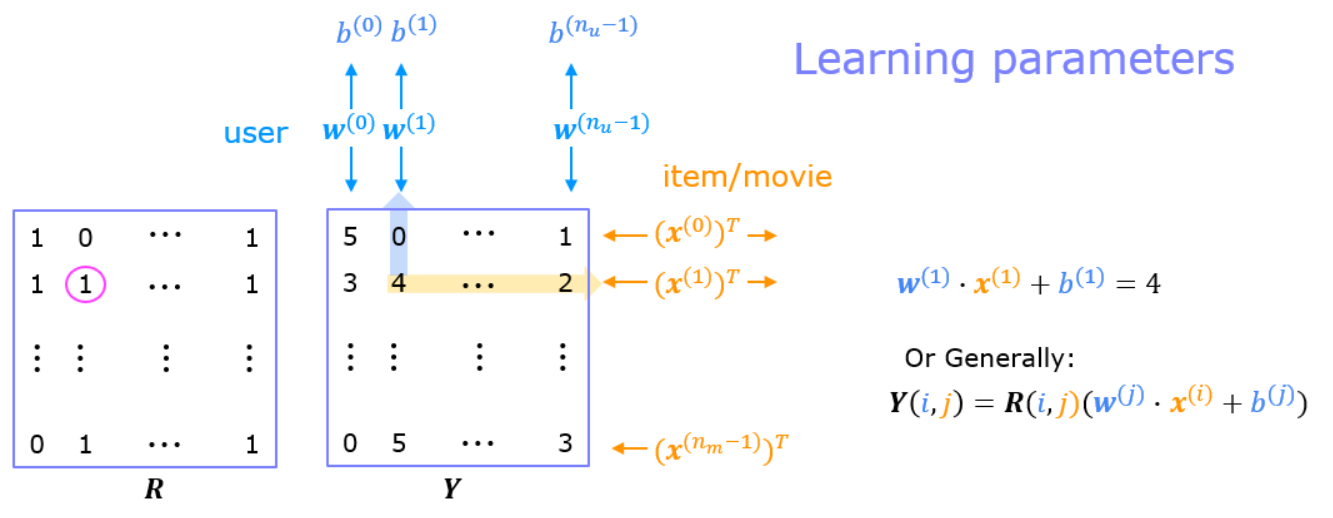

In [34]:
print("Creating user-item interaction matrix...")
unique_users = df_score['user_id'].unique()
unique_animes = df_anime['anime_id'].unique()
print(f"Jumlah users unik: {len(unique_users)}")
print(f"Jumlah anime unik: {len(unique_animes)}")

Creating user-item interaction matrix...
Jumlah users unik: 2528
Jumlah anime unik: 24905


In [35]:
# Create mappings for user_id and anime_id to matrix indices
user_to_index = {user: i for i, user in enumerate(unique_users)}
anime_to_index = {anime: i for i, anime in enumerate(unique_animes)}
index_to_user = {i: user for user, i in user_to_index.items()}
index_to_anime = {i: anime for anime, i in anime_to_index.items()}

In [36]:
# Create data matrix for the DMF model
num_users = len(unique_users)
num_animes = len(unique_animes)
# Gunakan sparse matrix untuk efisiensi memori
from scipy import sparse
data_matrix = sparse.lil_matrix((num_users, num_animes))

In [37]:
# Fill in the data matrix with ratings
print("Filling interaction matrix with ratings...")
for _, row in df_score.iterrows():
    user_idx = user_to_index.get(row['user_id'])
    anime_idx = anime_to_index.get(row['anime_id'])
    if user_idx is not None and anime_idx is not None:
        data_matrix[user_idx, anime_idx] = row['rating'] / 10.0  # Normalize ratings to [0,1]

print(f"Data matrix shape: {data_matrix.shape}")

Filling interaction matrix with ratings...
Data matrix shape: (2528, 24905)


In [38]:
## Prepare Training and Testing Data
from sklearn.model_selection import train_test_split

# Extract non-zero entries from the matrix
print("Preparing training and test data...")
ratings = []

# Cara yang benar untuk mengekstrak indeks dan nilai non-zero dari sparse matrix
coo_matrix = data_matrix.tocoo()  # Konversi ke format COO untuk mengakses row, col, dan data
for i, j, value in zip(coo_matrix.row, coo_matrix.col, coo_matrix.data):
    ratings.append((i, j, value))

# Convert to numpy array
ratings = np.array(ratings)

# Split into training and test sets
train_ratings, test_ratings = train_test_split(ratings, test_size=0.2, random_state=42)

print(f"Number of training samples: {len(train_ratings)}")
print(f"Number of test samples: {len(test_ratings)}")

Preparing training and test data...
Number of training samples: 291901
Number of test samples: 72976


In [39]:
## Generate negative samples for evaluation
def get_test_negatives(test_ratings, data_matrix, num_negatives=99):
    """
    For each user-item pair in test_ratings, generate num_negatives items that the user has not rated.
    Returns a list where each element contains [user, positive_item, negative_items...]
    """
    test_users = []
    test_items = []
    
    for entry in test_ratings:
        user, item, _ = entry
        test_users.append(int(user))
        neg_items = []
        
        # Find num_negatives items that the user has not rated
        for i in range(data_matrix.shape[1]):
            if data_matrix[int(user), i] == 0:
                neg_items.append(i)
                if len(neg_items) == num_negatives:
                    break
        
        items = [int(item)]
        items.extend(neg_items)
        test_items.append(items)
    
    return [test_users, test_items]

In [40]:
# Generate negative samples for testing
test_negatives = get_test_negatives(test_ratings, data_matrix)

# **Deep Matrix Factorization Model**

## **DeepMF**

In [41]:
class DMF:
    def __init__(self,
                 num_users,
                 num_items,
                 user_layers,
                 item_layers,
                 lr,
                 train_matrix):
        self.num_users = num_users
        self.num_items = num_items
        self.user_layers = user_layers
        self.item_layers = item_layers
        self.lr = lr
        # Untuk sparse matrix, kita tidak menggunakan full matrix conversion
        self.train_matrix = train_matrix  # Simpan referensi untuk digunakan sesuai kebutuhan
    
    @staticmethod
    def init_normal(shape, dtype=None):
        return tf.random.normal(shape=shape, stddev=0.01, dtype=dtype)
    
    @staticmethod
    def cosine_similarity(inputs, epsilon=1.0e-6, delta=1e-12):
        x, y = inputs[0], inputs[1]
        numerator = tf.reduce_sum(x * y, axis=1, keepdims=True)
        denominator = tf.sqrt(
            tf.reduce_sum(x * x, axis=1, keepdims=True) *
            tf.reduce_sum(y * y, axis=1, keepdims=True)
        )
        cosine_similarity = numerator / tf.maximum(denominator, delta)
        return tf.maximum(cosine_similarity, epsilon)
    
    def get_model(self):
        user_input = Input(shape=(1,), dtype='int32', name='user_input')
        item_input = Input(shape=(1,), dtype='int32', name='item_input')
        
        # Embedding layers untuk user dan item
        user_embedding = Embedding(input_dim=self.num_users,
                                  output_dim=min(128, self.num_items),
                                  embeddings_initializer='normal',
                                  name='user_embedding')(user_input)
        
        item_embedding = Embedding(input_dim=self.num_items,
                                  output_dim=min(128, self.num_users),
                                  embeddings_initializer='normal',
                                  name='item_embedding')(item_input)
        
        # Flatten embeddings
        user_vector_initial = Flatten()(user_embedding)
        item_vector_initial = Flatten()(item_embedding)
        
        user_vector = user_vector_initial
        item_vector = item_vector_initial
        
        # User layers
        for i in range(len(self.user_layers)):
            layer = Dense(self.user_layers[i],
                         activation='relu',
                         kernel_initializer=tf.keras.initializers.RandomNormal(stddev=0.01),
                         bias_initializer=tf.keras.initializers.RandomNormal(stddev=0.01),
                         name=f'user_layer{i+1}')
            user_vector = layer(user_vector)
        
        # Item layers
        for i in range(len(self.item_layers)):
            layer = Dense(self.item_layers[i],
                         activation='relu',
                         kernel_initializer=tf.keras.initializers.RandomNormal(stddev=0.01),
                         bias_initializer=tf.keras.initializers.RandomNormal(stddev=0.01),
                         name=f'item_layer{i+1}')
            item_vector = layer(item_vector)
        
        # Cosine similarity prediction
        predict = Lambda(function=self.cosine_similarity, name='predict')([user_vector, item_vector])
        
        # Create and compile model
        model = Model(inputs=[user_input, item_input], outputs=predict)
        model.compile(optimizer=optimizers.Adam(learning_rate=self.lr),
                     loss='binary_crossentropy')
        
        return model

In [42]:
def get_train_instances_fast(train_ratings, num_negatives, num_items=None):
    """
    Versi yang jauh lebih cepat untuk menghasilkan instance training
    """
    if num_items is None:
        num_items = data_matrix.shape[1]
        
    user_input, item_input, labels = [], [], []
    
    # Buat dictionary untuk menyimpan item yang telah dirating oleh user
    user_rated_items = {}
    for rating in train_ratings:
        user = int(rating[0])
        item = int(rating[1])
        if user not in user_rated_items:
            user_rated_items[user] = set()
        user_rated_items[user].add(item)
    
    # Pre-generate negative samples untuk setiap user
    user_neg_items = {}
    for user in user_rated_items:
        # Semua item yang belum dirating oleh user
        all_items = set(range(num_items))
        user_neg_items[user] = list(all_items - user_rated_items[user])
    
    # Generate training instances
    for rating in train_ratings:
        user = int(rating[0])
        pos_item = int(rating[1])
        rating_val = float(rating[2])
        
        # Positive instance
        user_input.append(user)
        item_input.append(pos_item)
        labels.append(rating_val)
        
        # Negative instances - ambil secara acak dari pre-generated negative items
        neg_items = np.random.choice(
            user_neg_items[user], 
            size=min(num_negatives, len(user_neg_items[user])), 
            replace=len(user_neg_items[user]) < num_negatives
        )
        
        for neg_item in neg_items:
            user_input.append(user)
            item_input.append(neg_item)
            labels.append(0.0)
    
    return user_input, item_input, labels

In [43]:
# Evaluation Functions
def get_hit_ratio(rank_list, positive_item):
    """
    Calculate Hit Ratio (HR) for a single test case.
    """
    return 1 if positive_item in rank_list else 0

def get_ndcg(rank_list, positive_item):
    """
    Calculate Normalized Discounted Cumulative Gain (NDCG) for a single test case.
    """
    for i, item in enumerate(rank_list):
        if item == positive_item:
            return np.log(2) / np.log(i + 2)
    return 0

def calculate_rmse(model, test_ratings, all_ratings=None):
    """
    Menghitung RMSE pada test ratings
    
    Args:
        model: Model DMF yang sudah dilatih
        test_ratings: List of tuples (user, item, rating)
        all_ratings: Dictionary semua rating untuk menghindari evaluasi pada data yang sudah dilihat (opsional)
    
    Returns:
        float: Nilai RMSE
    """
    user_ids = []
    item_ids = []
    true_ratings = []
    
    # Kumpulkan semua user, item, dan rating yang akan dievaluasi
    for rating in test_ratings:
        user, item, rating_val = rating
        user_ids.append(user)
        item_ids.append(item)
        true_ratings.append(rating_val)
    
    # Buat prediksi untuk pasangan (user, item)
    pred_ratings = model.predict([np.array(user_ids), np.array(item_ids)])
    
    # Jika model menghasilkan array 2D, ambil nilai dari setiap baris
    if len(pred_ratings.shape) > 1 and pred_ratings.shape[1] == 1:
        pred_ratings = pred_ratings.flatten()
    
    # Hitung RMSE
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    rmse = sqrt(mean_squared_error(true_ratings, pred_ratings))
    return rmse


In [44]:
def evaluate_model(model, test_ratings, test_negatives, topN):
    """
    Evaluate model dengan batch processing yang efisien.
    Mengembalikan HR, NDCG, dan RMSE.
    """
    hits, ndcgs = [], []
    
    # Persiapan untuk RMSE
    rmse_users = []
    rmse_items = []
    rmse_true_ratings = []
    
    # Kita gunakan batch yang jauh lebih besar
    batch_size = 2048
    n_test = len(test_ratings)
    
    # Koreksi akses ke test_negatives
    # Jika test_negatives adalah list, tetapi berisi tuple atau punya struktur khusus
    if isinstance(test_negatives, list) and len(test_negatives) >= 2 and isinstance(test_negatives[1], list):
        neg_items_list = test_negatives[1]  # Akses indeks 1 jika struktur [_, [items]]
    else:
        neg_items_list = test_negatives  # Gunakan secara langsung
    
    for start_idx in range(0, n_test, batch_size):
        end_idx = min(start_idx + batch_size, n_test)
        
        batch_users = []
        batch_items = []
        batch_item_lists = []
        batch_pos_items = []
        
        for i in range(start_idx, end_idx):
            # Pastikan indeks valid
            if i >= len(test_ratings) or i >= len(neg_items_list):
                continue
                
            user = int(test_ratings[i][0])
            pos_item = int(test_ratings[i][1])
            
            # Simpan untuk perhitungan RMSE
            rmse_users.append(user)
            rmse_items.append(pos_item)
            if len(test_ratings[i]) > 2:  # Jika ada nilai rating
                rmse_true_ratings.append(float(test_ratings[i][2]))
            
            # Ambil item negatif dengan penanganan error
            items = neg_items_list[i][:20] if i < len(neg_items_list) else []
            
            if not items:
                continue
                
            batch_pos_items.append(pos_item)
            batch_item_lists.append(items)
            
            user_inputs = np.full(len(items), user, dtype='int32')
            batch_users.extend(user_inputs)
            batch_items.extend(items)
        
        if not batch_users:
            continue
            
        batch_preds = model.predict(
            [np.array(batch_users), np.array(batch_items)],
            batch_size=8192,
            verbose=0
        ).flatten()
        
        start_pos = 0
        for idx, items in enumerate(batch_item_lists):
            n_items = len(items)
            user_preds = batch_preds[start_pos:start_pos+n_items]
            pos_item = batch_pos_items[idx]
            
            idx_sorted = np.argsort(-user_preds)[:topN]
            rank_list = [items[j] for j in idx_sorted]
            
            hits.append(get_hit_ratio(rank_list, pos_item))
            ndcgs.append(get_ndcg(rank_list, pos_item))
            
            start_pos += n_items
    
    # Hitung RMSE jika ada true ratings
    rmse = 0.0
    if rmse_true_ratings:
        # Prediksi rating untuk pasangan user-item
        rmse_preds = model.predict(
            [np.array(rmse_users), np.array(rmse_items)], 
            batch_size=8192,
            verbose=0
        ).flatten()
        
        # Hitung RMSE
        from sklearn.metrics import mean_squared_error
        from math import sqrt
        rmse = sqrt(mean_squared_error(rmse_true_ratings, rmse_preds))
    
    if not hits:
        return 0.0, 0.0, 0.0
        
    return np.mean(hits), np.mean(ndcgs), rmse

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def evaluate_dmf_detailed(model, test_ratings, test_negatives, topN, threshold=0.7):
    """
    Evaluate DMF model with recommendation and classification metrics
    
    Parameters:
    - model: Trained DMF model
    - test_ratings: Test data containing user-item-rating tuples
    - test_negatives: Negative samples for testing
    - topN: Number of top recommendations to consider
    - threshold: Rating threshold for binary classification
    
    Returns:
    - Dictionary containing various evaluation metrics
    """
    # Get HR and NDCG metrics first
    hr, ndcg = evaluate_model(model, test_ratings, test_negatives, topN)
    
    # Predict ratings for all test samples to calculate error metrics
    # Efisiensi: Gunakan batch processing untuk prediksi
    batch_size = 4096
    n_test = len(test_ratings)
    y_true = np.zeros(n_test)
    y_pred = np.zeros(n_test)
    
    for start_idx in range(0, n_test, batch_size):
        end_idx = min(start_idx + batch_size, n_test)
        
        # Prepare batch data
        batch_users = np.array([int(test_ratings[i][0]) for i in range(start_idx, end_idx)])
        batch_items = np.array([int(test_ratings[i][1]) for i in range(start_idx, end_idx)])
        
        # Get true ratings
        y_true[start_idx:end_idx] = [float(test_ratings[i][2]) for i in range(start_idx, end_idx)]
        
        # Predict ratings in batch
        batch_predictions = model.predict([batch_users, batch_items], batch_size=8192, verbose=0)
        
        # Handle shape issues - flatten if needed
        if len(batch_predictions.shape) > 1 and batch_predictions.shape[1] == 1:
            batch_predictions = batch_predictions.flatten()
            
        y_pred[start_idx:end_idx] = batch_predictions
    
    # Calculate RMSE
    rmse = np.sqrt(np.mean((y_true - y_pred)**2))
    
    # Convert ratings to binary classifications based on threshold
    actual_labels = (y_true >= threshold).astype(int)
    predicted_labels = (y_pred >= threshold).astype(int)
    
    # Calculate classification metrics
    try:
        cm = confusion_matrix(actual_labels, predicted_labels)
        
        # Extract confusion matrix components
        if cm.shape == (2, 2):
            tn, fp, fn, tp = cm.ravel()
        else:
            # Handle class imbalance
            classes = np.unique(np.concatenate([actual_labels, predicted_labels]))
            if len(classes) == 1:  # Only one class present
                if classes[0] == 1:  # Only positive class
                    tp = np.sum((actual_labels == 1) & (predicted_labels == 1))
                    fp, fn, tn = 0, 0, 0
                else:  # Only negative class
                    tn = np.sum((actual_labels == 0) & (predicted_labels == 0))
                    fp, fn, tp = 0, 0, 0
            else:
                print("Warning: Confusion matrix is not 2x2")
                tn, fp, fn, tp = 0, 0, 0, 0
    except Exception as e:
        print(f"Error in confusion matrix calculation: {e}")
        cm = np.zeros((2, 2))
        tn, fp, fn, tp = 0, 0, 0, 0
    
    # Calculate classification metrics with error handling
    try:
        accuracy = accuracy_score(actual_labels, predicted_labels)
    except Exception as e:
        print(f"Warning in accuracy calculation: {e}")
        accuracy = 0
        
    try:
        precision = precision_score(actual_labels, predicted_labels, zero_division=0)
        recall = recall_score(actual_labels, predicted_labels, zero_division=0)
        f1 = f1_score(actual_labels, predicted_labels, zero_division=0)
    except Exception as e:
        print(f"Warning in precision/recall calculation: {e}")
        precision, recall, f1 = 0, 0, 0
    
    return {
        'hr': hr,
        'ndcg': ndcg,
        'rmse': rmse,
        'confusion_matrix': cm,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'true_positive': tp,
        'true_negative': tn,
        'false_positive': fp,
        'false_negative': fn
    }

In [46]:
def print_dmf_evaluation_results(eval_results, topN):
    """
    Print detailed evaluation results for DMF model
    
    Parameters:
    - eval_results: Dictionary containing evaluation metrics
    - topN: Number of top recommendations considered
    """
    print("\n--- Deep Matrix Factorization Model Evaluation Results ---")
    
    print("\nRecommendation Metrics:")
    print(f"Hit Ratio (HR@{topN})  : {eval_results['hr']:.4f}")
    print(f"NDCG@{topN}            : {eval_results['ndcg']:.4f}")
    
    print("\nRegression Metrics:")
    print(f"RMSE                 : {eval_results['rmse']:.4f}")
    
    print("\nClassification Metrics:")
    print(f"Accuracy             : {eval_results['accuracy']:.4f}")
    print(f"Precision            : {eval_results['precision']:.4f}")
    print(f"Recall               : {eval_results['recall']:.4f}")
    print(f"F1-Score             : {eval_results['f1_score']:.4f}")
    
    print("\nConfusion Matrix:")
    print(eval_results['confusion_matrix'])
    print("\nComponents:")
    print(f"True Positive (TP)   : {eval_results['true_positive']}")
    print(f"True Negative (TN)   : {eval_results['true_negative']}")
    print(f"False Positive (FP)  : {eval_results['false_positive']}")
    print(f"False Negative (FN)  : {eval_results['false_negative']}")

In [47]:
# def evaluate_model_with_sampling(model, test_ratings, test_negatives, data_matrix, topN, sample_size=1000):
#     """
#     Evaluate the model using a sample of test data to speed up evaluation.
#     """
#     # Sample test data
#     indices = np.random.choice(len(test_ratings), min(sample_size, len(test_ratings)), replace=False)
#     sampled_test_ratings = [test_ratings[i] for i in indices]
#     sampled_test_users = [test_negatives[0][i] for i in indices]
#     sampled_test_items = [test_negatives[1][i] for i in indices]
    
#     sampled_test_negatives = [sampled_test_users, sampled_test_items]
    
#     print(f"Evaluating on {len(sampled_test_ratings)} sampled test instances (out of {len(test_ratings)})")
    
#     hits, ndcgs = [], []
    
#     # For each user-positive item pair in sampled test data
#     for i in range(len(sampled_test_ratings)):
#         user = int(sampled_test_ratings[i][0])
#         positive_item = int(sampled_test_ratings[i][1])
        
#         # Get items to test: positive item and negatives
#         items = sampled_test_items[i]
        
#         # Prepare input for prediction
#         user_input = np.full(len(items), user, dtype='int32')
#         item_input = np.array(items, dtype='int32')
        
#         # Get predictions
#         predictions = model.predict([user_input, item_input], batch_size=100, verbose=0).flatten()
        
#         # Create item-score map
#         item_score_map = {}
#         for j, item in enumerate(items):
#             item_score_map[item] = predictions[j]
        
#         # Get topN items
#         rank_list = sorted(item_score_map.items(), key=lambda x: x[1], reverse=True)[:topN]
#         rank_list = [x[0] for x in rank_list]
        
#         # Calculate metrics
#         hr = get_hit_ratio(rank_list, positive_item)
#         ndcg = get_ndcg(rank_list, positive_item)
        
#         hits.append(hr)
#         ndcgs.append(ndcg)
    
#     return np.mean(hits), np.mean(ndcgs)

## **Train the DMF Model**

In [48]:
# Model parameters
user_layers = [128, 32]  # Sebelumnya [512, 64], dikurangi lebih lanjut
item_layers = [128, 32]  # Sebelumnya [1024, 64], dikurangi lebih lanjut
learning_rate = 0.001    # Ditingkatkan untuk konvergensi lebih cepat
num_negatives = 4        # Dari 7 menjadi 4 untuk mengurangi jumlah data
topN = 10

# Kurangi jumlah epoch
epochs = 5  # Dari 10 menjadi 5

# Tingkatkan batch size untuk proses lebih cepat
batch_size = 1024  # Dari 256 menjadi 1024


In [49]:
# Tambahkan import untuk Embedding
from tensorflow.keras.layers import Input, Dense, Lambda, Flatten, Embedding, Dot

# Initialize DMF
dmf = DMF(num_users=num_users,
          num_items=num_animes,
          user_layers=user_layers,
          item_layers=item_layers,
          lr=learning_rate,
          train_matrix=data_matrix)

# Get the model
model = dmf.get_model()
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ user_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ item_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ user_embedding      │ (None, 1, 128)    │    323,584 │ user_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ item_embedding      │ (None, 1, 128)    │  3,187,840 │ item_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 128)       │          0 │ user_embedding[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 128)       │          0 │ item_embedding[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ user_layer1 (Dense) │ (None, 128)       │     16,512 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ item_layer1 (Dense) │ (None, 128)       │     16,512 │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ user_layer2 (Dense) │ (None, 32)        │      4,128 │ user_layer1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ item_layer2 (Dense) │ (None, 32)        │      4,128 │ item_layer1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ predict (Lambda)    │ (None, 1)         │          0 │ user_layer2[0][0… │
│                     │                   │            │ item_layer2[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,552,704 (13.55 MB)

 Trainable params: 3,552,704 (13.55 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
# Initial evaluation dengan batch processing (hasil dari optimasi sebelumnya)
print("Initial evaluation...")
hr, ndcg, rmse = evaluate_model(model, test_ratings, test_negatives, topN)
print(f"Initial HR: {hr:.4f}, NDCG: {ndcg:.4f}, RMSE: {rmse:.4f}")

Initial evaluation...


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Initial HR: 0.5652, NDCG: 0.2266, RMSE: 0.2848


In [51]:
# Training loop
best_hr = hr
best_ndcg = ndcg
best_rmse = rmse  # Tambahkan RMSE terbaik
best_epoch = 0
history = {'loss': [], 'hr': [], 'ndcg': [], 'rmse': []}  # Tambahkan rmse ke history

# Tambahkan variabel early stopping
patience = 5
no_improvement = 0

# Kurangi nilai num_negatives untuk mempercepat
num_negatives_reduced = min(num_negatives, 4)  # Gunakan max 4 negative samples

# Batasi jumlah contoh training untuk mempercepat proses
max_train_samples = 500000  # Sesuaikan dengan kebutuhan Anda
if len(train_ratings) > max_train_samples:
   print(f"Sampling {max_train_samples} dari {len(train_ratings)} training ratings...")
   indices = np.random.choice(len(train_ratings), max_train_samples, replace=False)
   sampled_train_ratings = [train_ratings[i] for i in indices]
else:
   sampled_train_ratings = train_ratings
   
# Tingkatkan batch size untuk training lebih cepat
batch_size = 1024  # Dari 256 menjadi 1024
   
for epoch in range(epochs):
   print(f"Epoch {epoch+1}/{epochs}")

   # Generate training instances dengan fungsi yang lebih cepat
   user_input, item_input, labels = get_train_instances_fast(sampled_train_ratings, num_negatives_reduced, num_animes)

   # Train the model
   hist = model.fit(
       x=[np.array(user_input), np.array(item_input)],
       y=np.array(labels),
       batch_size=batch_size,
       epochs=1,
       verbose=1,
       shuffle=True
   )
   
   # Simpan loss history
   loss = hist.history['loss'][0]
   history['loss'].append(loss)

   # Evaluasi model setiap epoch - dengan batasan items
   print(f"Evaluating model... ", end="")
   hr, ndcg, rmse = evaluate_model(model, test_ratings, test_negatives, topN)  # Tambahkan rmse
   history['hr'].append(hr)
   history['ndcg'].append(ndcg)
   history['rmse'].append(rmse)  # Simpan rmse ke history

   print(f"HR = {hr:.4f}, NDCG = {ndcg:.4f}, RMSE = {rmse:.4f}, Loss = {loss:.4f}")  # Tambahkan RMSE ke output
   
   # Track performa terbaik
   if hr > best_hr or (hr == best_hr and ndcg > best_ndcg):
       best_hr, best_ndcg, best_rmse, best_epoch = hr, ndcg, rmse, epoch + 1
       print(f"New best model!")
   else:
       no_improvement += 1
       if no_improvement >= patience:
           print(f"Early stopping triggered after {epoch+1} epochs")
           break

print(f"Pelatihan selesai. Performa terbaik pada epoch {best_epoch}: HR = {best_hr:.4f}, NDCG = {best_ndcg:.4f}, RMSE = {best_rmse:.4f}")  # Tambahkan RMSE

Epoch 1/5


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


1426/1426 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - loss: 0.2629
Evaluating model... HR = 0.3638, NDCG = 0.1718, RMSE = 0.3210, Loss = 0.2306
Epoch 2/5
1426/1426 ━━━━━━━━━━━━━━━━━━━━ 29s 20ms/step - loss: 0.2093
Evaluating model... HR = 0.3628, NDCG = 0.1718, RMSE = 0.3094, Loss = 0.2087
Epoch 3/5
1426/1426 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - loss: 0.2012
Evaluating model... HR = 0.3784, NDCG = 0.1745, RMSE = 0.3023, Loss = 0.2013
Epoch 4/5
1426/1426 ━━━━━━━━━━━━━━━━━━━━ 27s 19ms/step - loss: 0.1975
Evaluating model... HR = 0.4038, NDCG = 0.1840, RMSE = 0.2990, Loss = 0.1982
Epoch 5/5
1426/1426 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - loss: 0.1967
Evaluating model... HR = 0.3805, NDCG = 0.1774, RMSE = 0.2966, Loss = 0.1976
Early stopping triggered after 5 epochs
Pelatihan selesai. Performa terbaik pada epoch 0: HR = 0.5652, NDCG = 0.2266, RMSE = 0.2848


## **Visualize Training Results**

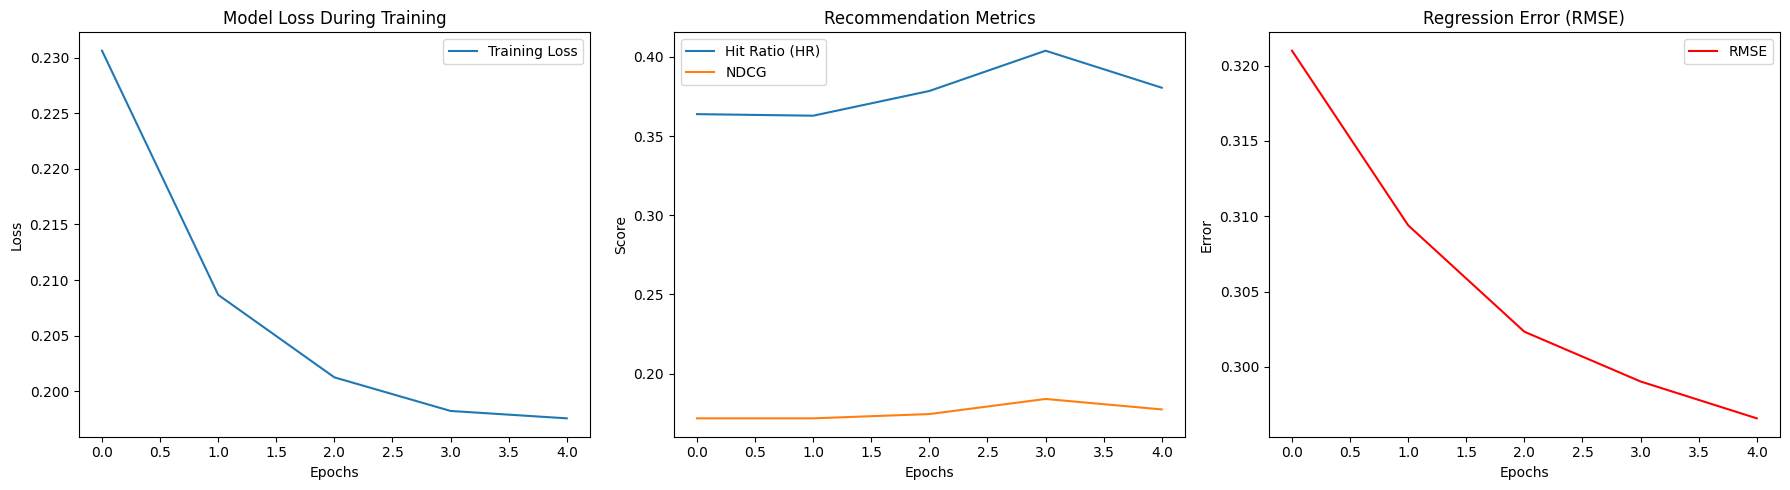

In [52]:
# Plot learning curves dengan RMSE
plt.figure(figsize=(18, 5))  # Perlebar untuk menampung 3 subplot

# Plot loss
plt.subplot(1, 3, 1)
plt.plot(history['loss'], label='Training Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot HR dan NDCG
plt.subplot(1, 3, 2)
plt.plot(history['hr'], label='Hit Ratio (HR)')
plt.plot(history['ndcg'], label='NDCG')
plt.title('Recommendation Metrics')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.legend()

# Plot RMSE
plt.subplot(1, 3, 3)
plt.plot(history['rmse'], label='RMSE', color='red')
plt.title('Regression Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()

plt.tight_layout()
plt.show()

## **Test Model Performance and Comprehensive Evaluation**

Final evaluation on test data: HR = 0.3743, NDCG = 0.1795, RMSE = 0.3007

Performance at different TopN values:
   TopN        HR      NDCG      RMSE
0     5  0.177003  0.116606  0.300734
1    10  0.374260  0.179470  0.300734
2    15  0.649871  0.251357  0.300734
3    20  1.000000  0.334029  0.300734


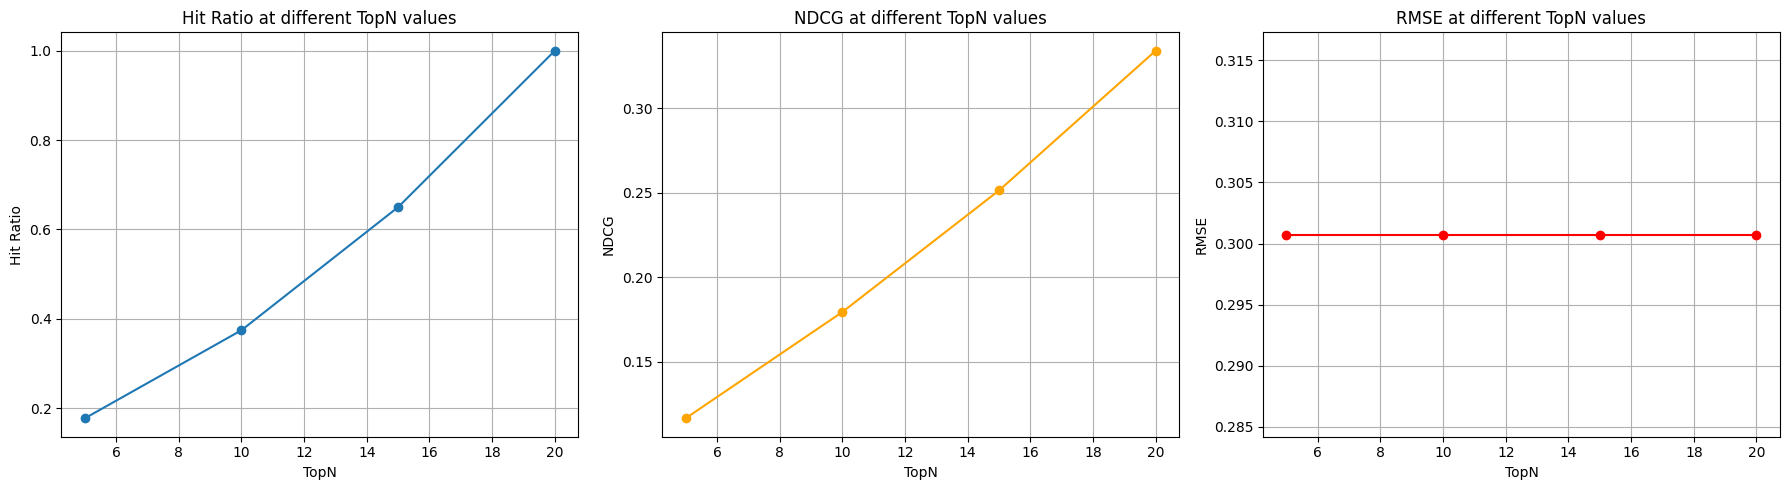

In [52]:
# Load best model weights
# model.load_weights('dmf_best_model.h5')

# Evaluate on test data with standard metrics
final_hr, final_ndcg, final_rmse = evaluate_model(model, test_ratings, test_negatives, topN)
print(f"Final evaluation on test data: HR = {final_hr:.4f}, NDCG = {final_ndcg:.4f}, RMSE = {final_rmse:.4f}")

# Compute statistics for different values of topN
topn_values = [5, 10, 15, 20]
results = []

for n in topn_values:
    hr, ndcg, rmse = evaluate_model(model, test_ratings, test_negatives, n)
    results.append([n, hr, ndcg, rmse])

# Display results table
results_df = pd.DataFrame(results, columns=['TopN', 'HR', 'NDCG', 'RMSE'])
print("\nPerformance at different TopN values:")
print(results_df)

# Plotting TopN effects
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.plot(results_df['TopN'], results_df['HR'], marker='o')
plt.title('Hit Ratio at different TopN values')
plt.xlabel('TopN')
plt.ylabel('Hit Ratio')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(results_df['TopN'], results_df['NDCG'], marker='o', color='orange')
plt.title('NDCG at different TopN values')
plt.xlabel('TopN')
plt.ylabel('NDCG')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(results_df['TopN'], results_df['RMSE'], marker='o', color='red')
plt.title('RMSE at different TopN values')
plt.xlabel('TopN')
plt.ylabel('RMSE')
plt.grid(True)

plt.tight_layout()
plt.show()

In [53]:
# ## Comprehensive Evaluation with Additional Metrics
# print("\n## Comprehensive Model Evaluation")
# print("Evaluating DMF with additional metrics...")

# # Evaluate model with threshold 0.7 (standard threshold)
# threshold = 0.7
# dmf_eval = evaluate_dmf_detailed(
#     model=model,
#     test_ratings=test_ratings,
#     test_negatives=test_negatives,
#     topN=topN,
#     threshold=threshold
# )
# print_dmf_evaluation_results(dmf_eval, topN)

# # Simple visualization of key metrics
# plt.figure(figsize=(12, 5))

# # Plot 1: Key metrics overview
# plt.subplot(1, 2, 1)
# metrics_names = ['HR', 'NDCG', 'RMSE']  # Removed MAE
# metrics_values = [dmf_eval['hr'], dmf_eval['ndcg'], dmf_eval['rmse']]  # Removed MAE value
# colors = ['blue', 'green', 'red']  # Removed orange for MAE

# plt.bar(metrics_names, metrics_values, color=colors)
# plt.title('DMF Performance - Key Metrics')
# plt.ylabel('Score')
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# # Plot 2: Confusion matrix
# plt.subplot(1, 2, 2)
# cm = dmf_eval['confusion_matrix']
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
# plt.title(f'Confusion Matrix (Threshold={threshold})')
# plt.ylabel('Actual')
# plt.xlabel('Predicted')

# plt.tight_layout()
# plt.savefig('dmf_evaluation_summary.png')
# plt.show()

## **Get Recommendations**

## **Predict 1**

In [61]:
# Cek user ID yang tersedia
print("Daftar User ID yang tersedia:")
# Konversi ke int biasa untuk menghilangkan format np.int64
sample_users = [int(uid) for uid in list(user_to_index.keys())[:10]]
print(f"Contoh Beberapa User ID: {sample_users}")

# Menggunakan user ID spesifik
user_id = 1  # Menggunakan user ID langsung
print(f"Menggunakan User ID: {user_id}")

Daftar User ID yang tersedia:
Contoh Beberapa User ID: [1, 4, 9, 20, 23, 37, 47, 48, 53, 66]
Menggunakan User ID: 1


In [54]:
def get_recommendations_dmf(model, user_id, df_anime, df_score, user_to_index, index_to_anime, top_n=10):
    """
    Memberikan rekomendasi anime untuk user berdasarkan model DMF dengan perbandingan rating asli.
    
    Parameters:
    - model: Model DMF yang sudah dilatih
    - user_id: ID user yang ingin diberi rekomendasi
    - df_anime: DataFrame informasi anime
    - df_score: DataFrame rating user
    - user_to_index: Mapping user_id ke indeks internal
    - index_to_anime: Mapping indeks internal ke anime_id
    - top_n: Jumlah rekomendasi yang ingin ditampilkan
    
    Returns:
    - DataFrame berisi rekomendasi anime dengan perbandingan rating asli user (jika ada)
    """
    if user_id not in user_to_index:
        print(f"User ID {user_id} tidak ditemukan dalam dataset")
        return None
    
    # Dapatkan user index
    user_idx = user_to_index[user_id]
    
    # Siapkan data untuk prediksi
    all_items = np.arange(len(index_to_anime))
    user_input = np.full(len(all_items), user_idx)
    
    # Prediksi skor untuk semua anime
    print(f"Memprediksi rating untuk semua anime untuk user ID {user_id}...")
    predictions = model.predict(
        [user_input, all_items],
        batch_size=4096,
        verbose=1
    ).flatten()
    
    # Ambil data rating yang diberikan oleh user
    user_ratings = df_score[df_score['user_id'] == user_id]
    print(f"User ini telah menilai {len(user_ratings)} anime")
    
    # Dapatkan anime_ids yang telah dinilai
    rated_anime_ids = user_ratings['anime_id'].tolist()
    
    # Konversi indeks prediksi ke anime_id
    anime_id_to_score = {index_to_anime[i]: score*10 for i, score in enumerate(predictions)}
    
    # Buat DataFrame untuk semua prediksi
    all_predictions = pd.DataFrame({
        'anime_id': list(anime_id_to_score.keys()),
        'Rating_Prediction': list(anime_id_to_score.values())
    })
    
    # Gabungkan dengan informasi anime
    all_predictions = all_predictions.merge(
        df_anime[['anime_id', 'Name', 'Genres', 'Score']], 
        on='anime_id'
    )
    
    # Pisahkan antara anime yang sudah dinilai dan belum dinilai
    rated_predictions = all_predictions[all_predictions['anime_id'].isin(rated_anime_ids)].copy()
    unrated_predictions = all_predictions[~all_predictions['anime_id'].isin(rated_anime_ids)].copy()
    
    # Jika ada anime yang sudah dinilai
    if len(rated_predictions) > 0:
        # Gabungkan dengan rating asli
        rated_predictions = rated_predictions.merge(
            user_ratings[['anime_id', 'rating']], 
            on='anime_id'
        ).rename(columns={'rating': 'User_Rating'})
        
        # Urutkan berdasarkan prediksi tertinggi
        rated_predictions = rated_predictions.sort_values('Rating_Prediction', ascending=False)
    
    # Urutkan dan ambil top-n rekomendasi untuk anime yang belum dinilai
    unrated_predictions = unrated_predictions.sort_values('Rating_Prediction', ascending=False).head(top_n)
    
    # Return both dataframes
    return rated_predictions, unrated_predictions

In [57]:
# Contoh penggunaan
user_id = 1

# Dapatkan rekomendasi
rated_predictions, unrated_predictions = get_recommendations_dmf(
    model=model,  # Model DMF yang sudah dilatih
    user_id=user_id,
    df_anime=df_anime,
    df_score=df_score,
    user_to_index=user_to_index,
    index_to_anime=index_to_anime,
    top_n=10
)

# Tampilkan hasil hanya untuk anime yang sudah dinilai
if len(rated_predictions) > 0:
    print(f"\nTop 10 Anime yang Sudah Dinilai oleh User ID: {user_id}")
    display(rated_predictions[['Name', 'Genres', 'Score', 'Rating_Prediction', 'User_Rating']].head(10))
    
    # Hitung error
    error = rated_predictions['Rating_Prediction'] - rated_predictions['User_Rating']
    print(f"\nEvaluasi untuk {len(rated_predictions)} anime yang dinilai:")
    print(f"RMSE: {np.sqrt(np.mean(error**2)):.4f}")
    print(f"MAE: {np.mean(np.abs(error)):.4f}")
else:
    print(f"\nUser ID {user_id} belum menilai anime apapun dalam dataset.")

Memprediksi rating untuk semua anime untuk user ID 1...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
User ini telah menilai 262 anime

Top 10 Anime yang Sudah Dinilai oleh User ID: 1


,Name,Genres,Score,Rating_Prediction,User_Rating
20,Rurouni Kenshin: Meiji Kenkaku Romantan - Tsui...,"Action, Drama, Romance",8.71,8.709360,10
67,Mononoke Hime,"Action, Adventure, Award Winning, Fantasy",8.67,8.587173,9
11,One Piece,"Action, Adventure, Fantasy",8.69,8.579971,9
48,Fullmetal Alchemist,"Action, Adventure, Award Winning, Drama, Fantasy",8.11,8.578831,9
91,Sen to Chihiro no Kamikakushi,"Adventure, Award Winning, Supernatural",8.78,8.518037,10
194,Suzumiya Haruhi no Yuuutsu,"Award Winning, Comedy, Mystery, Sci-Fi",7.83,8.494119,10
0,Cowboy Bebop,"Action, Award Winning, Sci-Fi",8.75,8.493835,10
213,Death Note,"Supernatural, Suspense",8.62,8.484001,9
117,Great Teacher Onizuka,Comedy,8.69,8.458142,9
42,Full Metal Panic? Fumoffu,"Action, Comedy",8.03,8.445707,10



Evaluasi untuk 262 anime yang dinilai:
RMSE: 2.0401
MAE: 1.4168


In [59]:
# Filter hasil rekomendasi berdasarkan genre tertentu
genre_filter = "Action"  # Misalnya kita tertarik dengan anime genre Action

# Dapatkan semua rekomendasi untuk user terlebih dahulu
rated_predictions, _ = get_recommendations_dmf(
    model=model,  # Model DMF yang sudah dilatih
    user_id=user_id,
    df_anime=df_anime,
    df_score=df_score,
    user_to_index=user_to_index,
    index_to_anime=index_to_anime,
    top_n=10
)

# Filter berdasarkan genre dan hanya yang sudah diberi rating
dmf_genre_rated = rated_predictions[rated_predictions['Genres'].str.contains(genre_filter, na=False)]

# Urutkan berdasarkan prediksi rating tertinggi
dmf_genre_rated = dmf_genre_rated.sort_values(by='Rating_Prediction', ascending=False)

# Tampilkan hasil yang sudah dinilai oleh user
if len(dmf_genre_rated) > 0:
    print(f"\nTop 10 Anime Bergenre {genre_filter} yang Sudah Dinilai oleh User ID: {user_id}")
    display(dmf_genre_rated[['Name', 'Genres', 'Score', 'Rating_Prediction', 'User_Rating']].head(10))
    
    # Hitung error untuk anime bergenre ini yang sudah dinilai
    rmse_genre = np.sqrt(np.mean((dmf_genre_rated['Rating_Prediction'] - dmf_genre_rated['User_Rating'])**2))
    mae_genre = np.mean(np.abs(dmf_genre_rated['Rating_Prediction'] - dmf_genre_rated['User_Rating']))
    print(f"RMSE: {rmse_genre:.4f}, MAE: {mae_genre:.4f}")
else:
    print(f"\nUser belum menilai anime dengan genre {genre_filter}")

Memprediksi rating untuk semua anime untuk user ID 1...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
User ini telah menilai 262 anime

Top 10 Anime Bergenre Action yang Sudah Dinilai oleh User ID: 1


,Name,Genres,Score,Rating_Prediction,User_Rating
20,Rurouni Kenshin: Meiji Kenkaku Romantan - Tsui...,"Action, Drama, Romance",8.71,8.709360,10
67,Mononoke Hime,"Action, Adventure, Award Winning, Fantasy",8.67,8.587173,9
11,One Piece,"Action, Adventure, Fantasy",8.69,8.579971,9
48,Fullmetal Alchemist,"Action, Adventure, Award Winning, Drama, Fantasy",8.11,8.578831,9
0,Cowboy Bebop,"Action, Award Winning, Sci-Fi",8.75,8.493835,10
42,Full Metal Panic? Fumoffu,"Action, Comedy",8.03,8.445707,10
217,Code Geass: Hangyaku no Lelouch,"Action, Award Winning, Drama, Sci-Fi",8.70,8.431346,8
229,Tengen Toppa Gurren Lagann,"Action, Adventure, Award Winning, Sci-Fi",8.63,8.400746,8
111,Elfen Lied,"Action, Drama, Horror, Romance, Supernatural",7.48,8.385164,8
148,Final Fantasy VII: Advent Children,"Action, Fantasy",7.72,8.372509,7


RMSE: 1.8793, MAE: 1.2772


## **Predict 2**

Menghitung jarak antar vektor embeddings

In [59]:
def sq_dist(a, b):
    """
    Returns the squared distance between two vectors
    Args:
      a (ndarray (n,)): vector with n features
      b (ndarray (n,)): vector with n features
    Returns:
      d (float) : distance
    """
    d = np.sum(np.square(a - b))
    return d

In [60]:
# Ekstrak layer embedding dari model DMF untuk item/anime
# Buat model baru yang hanya mengambil item embedding
item_input = Input(shape=(1,), dtype='int32', name='item_input_extract')
item_embedding = model.get_layer('item_embedding')(item_input)
item_flat = Flatten()(item_embedding)

# Tambahkan layer dense jika perlu
for i in range(len(dmf.item_layers)):
    layer_name = f'item_layer{i+1}'
    item_layer = model.get_layer(layer_name)
    item_flat = item_layer(item_flat)  # Gunakan layer yang didapat, bukan string layer_name

# Buat model untuk ekstraksi embedding
item_model = Model(inputs=item_input, outputs=item_flat)
item_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ item_input_extract (InputLayer) │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ item_embedding (Embedding)      │ (None, 1, 128)         │     3,187,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ item_layer1 (Dense)             │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ item_layer2 (Dense)             │ (None, 32)             │         4,128 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,208,480 (12.24 MB)

 Trainable params: 3,208,480 (12.24 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
# Ekstrak embeddings untuk semua anime
all_anime_ids = np.arange(len(index_to_anime))
anime_embeddings = item_model.predict(all_anime_ids, batch_size=4096, verbose=1)

print(f"Ukuran embeddings semua anime: {anime_embeddings.shape}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Ukuran embeddings semua anime: (24905, 32)


In [62]:
# Batasi jumlah anime untuk kecepatan perhitungan
count = 50  # jumlah anime yang akan ditampilkan
dim = len(anime_embeddings)

# Gunakan subset data untuk demonstrasi yang lebih cepat
subset_size = min(1000, dim)
anime_embeddings_subset = anime_embeddings[:subset_size]
dim = subset_size

print(f"Menggunakan {dim} anime untuk perhitungan kesamaan...")

# Hitung matrix jarak dengan pendekatan vectorized
from scipy.spatial.distance import pdist, squareform

# Hitung semua jarak sekaligus
pairwise_dists = pdist(anime_embeddings_subset, 'sqeuclidean')
dist_matrix = squareform(pairwise_dists)

# Masking diagonal (jarak anime dengan dirinya sendiri)
masked_dist = np.ma.masked_array(dist_matrix, mask=np.identity(dist_matrix.shape[0]))

print(f"Ukuran matrix jarak: {dist_matrix.shape}")
print(f"Nilai minimum jarak (anime yang paling mirip): {np.min(masked_dist)}")
print(f"Nilai maksimum jarak (anime yang paling berbeda): {np.max(masked_dist)}")

Menggunakan 1000 anime untuk perhitungan kesamaan...
Ukuran matrix jarak: (1000, 1000)
Nilai minimum jarak (anime yang paling mirip): 0.00014154970895430274
Nilai maksimum jarak (anime yang paling berbeda): 123.22419073642085


In [63]:
# Tujuannya adalah mendapatkan 1 anime yang paling mirip dari setiap anime.
header = ["anime1", "genre1", "anime2", "genre2"]
similar_anime_pairs = []

for i in range(count):
    min_idx = np.argmin(masked_dist[i])  # Dapatkan index dengan nilai similarity terkecil
    anime1_id = int(df_anime.iloc[i]['anime_id'])
    anime2_id = int(df_anime.iloc[min_idx]['anime_id'])
    
    # Dapatkan informasi nama dan genre
    anime1_info = df_anime[df_anime['anime_id'] == anime1_id].iloc[0]
    anime2_info = df_anime[df_anime['anime_id'] == anime2_id].iloc[0]
    
    similar_anime_pairs.append([
        anime1_info['Name'], 
        anime1_info['Genres'],
        anime2_info['Name'], 
        anime2_info['Genres']
    ])

# Buat dan tampilkan dataframe hasil
similar_anime_df = pd.DataFrame(similar_anime_pairs, columns=header)
print("Anime yang Paling Mirip Berdasarkan Embeddings DMF:")
display(similar_anime_df)

Anime yang Paling Mirip Berdasarkan Embeddings DMF:


,anime1,genre1,anime2,genre2
0,Cowboy Bebop,"Action, Award Winning, Sci-Fi",Sen to Chihiro no Kamikakushi,"Adventure, Award Winning, Supernatural"
1,Cowboy Bebop: Tengoku no Tobira,"Action, Sci-Fi",Black Lagoon,Action
2,Trigun,"Action, Adventure, Sci-Fi",Tonari no Totoro,"Adventure, Award Winning, Supernatural"
3,Witch Hunter Robin,"Action, Drama, Mystery, Supernatural",Tennis no Ouji-sama,Sports
4,Bouken Ou Beet,"Adventure, Fantasy, Supernatural",Zoids Shinseiki/Zero,"Adventure, Comedy, Sci-Fi, Sports"
5,Eyeshield 21,Sports,Fushigi Yuugi,"Adventure, Fantasy, Romance"
6,Hachimitsu to Clover,"Comedy, Drama, Romance",Kino no Tabi: The Beautiful World,"Action, Adventure, Slice of Life"
7,Hungry Heart: Wild Striker,"Comedy, Slice of Life, Sports",Kurau Phantom Memory,"Action, Drama, Sci-Fi"
8,Initial D Fourth Stage,"Action, Drama",Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shin...,"Action, Adventure, Fantasy"
9,Monster,"Drama, Mystery, Suspense",Mushishi,"Adventure, Mystery, Slice of Life, Supernatural"


 Fungsi untuk mencari anime yang mirip dengan anime tertentu:

In [64]:
def find_similar_anime(anime_id, anime_embeddings, df_anime, top_n=10):
    """
    Mencari anime yang paling mirip dengan anime tertentu berdasarkan embeddings
    
    Parameters:
    - anime_id: ID anime yang jadi acuan
    - anime_embeddings: Matrix embeddings semua anime
    - df_anime: DataFrame berisi informasi anime
    - top_n: Jumlah anime mirip yang akan ditampilkan
    
    Returns:
    - DataFrame berisi anime yang mirip
    """
    # Cari indeks anime yang dimaksud
    anime_idx = np.where(df_anime['anime_id'] == anime_id)[0]
    
    if len(anime_idx) == 0:
        print(f"Anime dengan ID {anime_id} tidak ditemukan")
        return None
    
    anime_idx = anime_idx[0]
    anime_embedding = anime_embeddings[anime_idx]
    
    # Hitung jarak ke semua anime lain
    distances = np.array([sq_dist(anime_embedding, emb) for emb in anime_embeddings])
    
    # Masking anime itu sendiri
    distances[anime_idx] = np.inf
    
    # Ambil top-n anime dengan jarak terdekat
    closest_indices = np.argsort(distances)[:top_n]
    
    # Ambil informasi anime
    similar_anime = df_anime.iloc[closest_indices].copy()
    similar_anime['Distance'] = distances[closest_indices]
    
    return similar_anime

In [67]:
# Pilih anime tertentu sebagai acuan
target_anime_id = 1  # Misalnya: Cowboy Bebop

# Tampilkan detail anime acuan
target_anime = df_anime[df_anime['anime_id'] == target_anime_id].iloc[0]
print(f"Anime Acuan: {target_anime['Name']} (ID: {target_anime_id})")
print(f"Genre: {target_anime['Genres']}")
print(f"Score: {target_anime['Score']}")
print("\nMencari anime yang mirip...")

# Cari anime yang mirip
similar_anime = find_similar_anime(target_anime_id, anime_embeddings, df_anime, top_n=10)

# Tampilkan hasil
if similar_anime is not None:
    print("\nTop 10 Anime yang Paling Mirip:")
    display(similar_anime[['Name', 'Genres', 'Score', 'Distance']])

Anime Acuan: Cowboy Bebop (ID: 1)
Genre: Action, Award Winning, Sci-Fi
Score: 8.75

Mencari anime yang mirip...

Top 10 Anime yang Paling Mirip:


,Name,Genres,Score,Distance
3961,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy",9.10,0.001393
1822,Tengen Toppa Gurren Lagann,"Action, Adventure, Award Winning, Sci-Fi",8.63,0.021195
1393,Death Note,"Supernatural, Suspense",8.62,0.023173
176,Sen to Chihiro no Kamikakushi,"Adventure, Award Winning, Supernatural",8.78,0.028351
2061,Baccano!,"Action, Comedy, Mystery, Supernatural",8.37,0.029710
100,Fullmetal Alchemist,"Action, Adventure, Award Winning, Drama, Fantasy",8.11,0.031362
766,Suzumiya Haruhi no Yuuutsu,"Award Winning, Comedy, Mystery, Sci-Fi",7.83,0.031933
52,Full Metal Panic? Fumoffu,"Action, Comedy",8.03,0.050585
2049,Toki wo Kakeru Shoujo,"Award Winning, Drama, Romance, Sci-Fi",8.11,0.050797
804,Black Lagoon,Action,8.03,0.055357


## **Save and Load Model**

In [ ]:
# # Save model
# model.save('dmf.h5')
# print("Model saved as 'dmf.h5'")

# # Test loading the model and making predictions
# try:
#     loaded_model = tf.keras.models.load_model('dmf.h5')
#     print("Successfully loaded model")
    
#     # Generate recommendations using loaded model
#     print("Generating recommendations with loaded model...")
#     recommendations = get_recommendations(loaded_model, sample_user_id, top_n=5)
#     print("\nTop 5 Recommendations from loaded model:")
#     for i, rec in enumerate(recommendations):
#         print(f"{i+1}. {rec['name']} (Predicted Score: {rec['score']:.4f})")
# except Exception as e:
#     print(f"Error loading model: {e}")

Model saved as 'dmf.h5'
Error loading model: Exception encountered when calling Lambda.call().

We could not automatically infer the shape of the Lambda's output. Please specify the `output_shape` argument for this Lambda layer.

Arguments received by Lambda.call():
  • args=(['<KerasTensor shape=(None, 32), dtype=float32, sparse=False, name=keras_tensor_29>', '<KerasTensor shape=(None, 32), dtype=float32, sparse=False, name=keras_tensor_31>'],)
  • kwargs={'mask': ['None', 'None']}


In [75]:
# Save model weights (bukan model utuh)
model.save_weights('dmf.weights.h5')  # Perbaikan: tambahkan .weights.h5 sebagai akhiran
print("Model weights saved as 'dmf.weights.h5'")

# Fungsi untuk membuat ulang model dan memuat weights
def load_dmf_model(weights_path):
    # Buat model DMF baru
    dmf_new = DMF(num_users=num_users,
                 num_items=num_animes,
                 user_layers=user_layers,
                 item_layers=item_layers,
                 lr=learning_rate,
                 train_matrix=None)  # Tidak perlu train_matrix untuk prediksi
                
    # Dapatkan model
    new_model = dmf_new.get_model()
    
    # Load weights
    new_model.load_weights(weights_path)
    
    return new_model

Model weights saved as 'dmf.weights.h5'


In [76]:
# Test loading the model weights dan rebuild model
try:
    # Rebuild model dan load weights
    loaded_model = load_dmf_model('dmf.weights.h5')  # Perbaikan: sesuaikan nama file
    print("Successfully loaded model weights and rebuilt model")
    
    # Cek performa model yang dimuat
    hr, ndcg, rmse = evaluate_model(loaded_model, test_ratings, test_negatives, topN)
    print(f"Performa model: HR = {hr:.4f}, NDCG = {ndcg:.4f}, RMSE = {rmse:.4f}")
    
    # Generate recommendations menggunakan model yang dimuat
    user_id = 23  # Gunakan user ID contoh
    print(f"\nMenghasilkan rekomendasi untuk User ID: {user_id}")
    
    recommendations = get_recommendations_dmf(
        model=loaded_model,
        user_id=user_id,
        df_anime=df_anime,
        user_to_index=user_to_index,
        index_to_anime=index_to_anime,
        top_n=5
    )
    
    # Tampilkan rekomendasi
    if recommendations is not None:
        print("\nTop 5 Rekomendasi:")
        display(recommendations[['Name', 'Genres', 'Score', 'Prediction_Score']].head(5))
    
except Exception as e:
    print(f"Error loading model: {e}")

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Successfully loaded model weights and rebuilt model
Performa model: HR = 0.4053, NDCG = 0.1958, RMSE = 0.3121

Menghasilkan rekomendasi untuk User ID: 23
Memprediksi rating untuk semua anime untuk user ID 23...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

Top 5 Rekomendasi:


,Name,Genres,Score,Prediction_Score
2647,Code Geass: Hangyaku no Lelouch R2,"Action, Award Winning, Drama, Sci-Fi",8.91,8.097303
3961,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy",9.10,8.067852
0,Cowboy Bebop,"Action, Award Winning, Sci-Fi",8.75,8.054297
5873,Mahou Shoujo Madoka★Magica,"Award Winning, Drama, Suspense",8.36,8.031682
1431,Code Geass: Hangyaku no Lelouch,"Action, Award Winning, Drama, Sci-Fi",8.70,7.976083


## **HYBRID RECOMMENDATION**

In [78]:
# Import Libraries
import joblib
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split


In [120]:
# Class untuk hybrid model dengan kalibrasi yang lebih seimbang
class HybridAnimeRecommendation:
    def __init__(self, dmf_model, user_scaler, anime_scaler, target_scaler, 
                 user_data_vecs, anime_data_vecs, alpha=0.4):
        """
        Model hybrid yang menggabungkan DMF dengan Neural Content-Based Filtering
        
        Args:
            dmf_model: Model DMF yang sudah dilatih
            user_scaler: Scaler untuk normalisasi data user
            anime_scaler: Scaler untuk normalisasi data anime
            target_scaler: Scaler untuk transformasi nilai target
            user_data_vecs: Vector representasi dari user
            anime_data_vecs: Vector representasi dari anime
            alpha: Bobot untuk DMF (1-alpha adalah bobot untuk NCBF)
        """
        self.dmf_model = dmf_model
        self.user_scaler = user_scaler
        self.anime_scaler = anime_scaler
        self.target_scaler = target_scaler
        self.user_data_vecs = user_data_vecs
        self.anime_data_vecs = anime_data_vecs
        self.alpha = alpha
        
        print(f"DMF weight: {self.alpha}, NCBF weight: {1-self.alpha}")
        
        # Selalu build model NCBF dan muat weights secara terpisah
        # Ini lebih stabil daripada load_model() dengan Lambda layer
        self.ncbf_model = self._build_ncbf_model()
        try:
            self.ncbf_model.load_weights('content_based.h5')
            print("NCBF weights loaded successfully")
        except Exception as e:
            print(f"Could not load weights: {e}")
            print("Using model without pretrained weights")
    
    def _build_ncbf_model(self):
        """Membuat model Neural Content-Based Filtering"""
        # Definisikan arsitektur yang sama dengan model NCBF asli
        num_outputs = 10
        
        # User Neural Network
        user_NN = tf.keras.models.Sequential([
            tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=l2(0.01)),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(32, activation="relu"),
            tf.keras.layers.Dense(num_outputs)
        ])

        # Anime Neural Network 
        anime_NN = tf.keras.models.Sequential([
            tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=l2(0.01)),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(32, activation="relu"),
            tf.keras.layers.Dense(num_outputs)
        ])

        # Input untuk user (sesuaikan dengan dimensi user vector)
        input_user = tf.keras.layers.Input(shape=(self.user_data_vecs.shape[1],))
        vu = user_NN(input_user)
        vu = L2NormalizeLayer()(vu)  # Normalisasi L2

        # Input untuk anime (sesuaikan dengan dimensi anime vector)
        input_anime = tf.keras.layers.Input(shape=(self.anime_data_vecs.shape[1],))
        va = anime_NN(input_anime)
        va = L2NormalizeLayer()(va)  # Normalisasi L2

        # Dot product antara user dan anime
        output = tf.keras.layers.Dot(axes=1)([vu, va])

        # Model akhir
        model = tf.keras.Model([input_user, input_anime], output)
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                     loss='mean_absolute_error')
        
        return model
    
    def _calibrate_prediction(self, pred, anime_id=None):
        """
        Kalibrasi prediksi agar sesuai dengan skala rating MAL (7-9)
        dengan pendekatan yang lebih moderat
        
        Args:
            pred: Prediksi rating mentah
            anime_id: ID anime untuk kalibrasi khusus berdasarkan anime (opsional)
            
        Returns:
            float: Prediksi yang sudah dikalibrasi
        """
        # Kalibrasi yang lebih moderate
        calibrated = pred * 1.45 + 1.5  # Kalibrasi lebih moderat
        
        # Pastikan tidak melebihi 9.7 (bukan perfect 10)
        calibrated = min(calibrated, 9.7)
        
        # Kalibrasi tambahan berdasarkan rentang prediksi
        if pred < 2.0:  # Prediksi sangat rendah
            # Kurangi efek kalibrasi untuk prediksi rendah
            calibrated = calibrated * 0.9
        elif pred > 5.0:  # Prediksi sangat tinggi
            # Batasi prediksi tertinggi ke level lebih realistis
            calibrated = min(calibrated, 9.3)
        
        return calibrated
        
    def predict(self, user_id, anime_id):
        """
        Memprediksi rating untuk pasangan user-anime tertentu
        
        Args:
            user_id: ID user
            anime_id: ID anime
            
        Returns:
            float: Rating prediksi
        """
        # Prediksi dari DMF
        dmf_pred = self.predict_dmf(user_id, anime_id)
        
        # Gunakan hanya DMF jika alpha = 1.0
        if self.alpha == 1.0:
            return self._calibrate_prediction(dmf_pred, anime_id)
            
        # Prediksi dari Neural Content-Based
        try:
            ncbf_pred = self.predict_ncbf(user_id, anime_id)
            
            # Boost moderat berdasarkan skor actual anime dari MAL
            anime_actual_score = 0
            anime_data = df_anime[df_anime['anime_id'] == anime_id]
            if not anime_data.empty and not np.isnan(anime_data.iloc[0]['Score']):
                anime_actual_score = anime_data.iloc[0]['Score']
                # Boost moderat untuk anime dengan skor tinggi
                if anime_actual_score >= 8.5:
                    boost = 0.3  # Boost lebih kecil
                elif anime_actual_score >= 8.0:
                    boost = 0.2
                elif anime_actual_score >= 7.5:
                    boost = 0.1
                else:
                    boost = 0
                
                hybrid_pred = self.alpha * dmf_pred + (1 - self.alpha) * ncbf_pred + boost
            else:
                # Default weighting
                hybrid_pred = self.alpha * dmf_pred + (1 - self.alpha) * ncbf_pred
            
            # Kalibrasi hasil
            return self._calibrate_prediction(hybrid_pred, anime_id)
        except Exception as e:
            # Jika ada masalah dengan NCBF, gunakan hanya DMF
            return self._calibrate_prediction(dmf_pred, anime_id)
    
    def predict_dmf(self, user_id, anime_id):
        """Prediksi menggunakan model DMF"""
        # Convert user_id dan anime_id ke format internal model
        user_idx = user_to_index.get(user_id)
        anime_idx = anime_to_index.get(anime_id)
        
        if user_idx is None or anime_idx is None:
            return 0.0  # Tidak ditemukan
        
        # Prediksi menggunakan model DMF
        pred = self.dmf_model.predict(
            [np.array([user_idx]), np.array([anime_idx])],
            verbose=0
        )[0][0]
        
        # Konversi ke skala 1-10
        pred = pred * 10
        
        return pred
    
    def predict_ncbf(self, user_id, anime_id):
        """Prediksi menggunakan model Neural Content-Based"""
        try:
            # Cari user di average_user_df_score
            user_data = average_user_df_score[average_user_df_score['user_id'] == user_id]
            
            if len(user_data) == 0:
                return 0.0  # User tidak ditemukan
                
            # Dapatkan vektor user
            user_vec = user_data.iloc[:, 1:].values[0].reshape(1, -1)
            
            # Cari anime di dataset
            anime_data = anime_one_hot_df[anime_one_hot_df['anime_id'] == anime_id]
            
            if len(anime_data) == 0:
                return 0.0  # Anime tidak ditemukan
                
            # Dapatkan vektor anime
            anime_vec = anime_data.iloc[:, 1:].values[0].reshape(1, -1)
            
            # Normalisasi vektors
            user_vec_scaled = self.user_scaler.transform(user_vec)
            anime_vec_scaled = self.anime_scaler.transform(anime_vec)
            
            # Prediksi menggunakan model NCBF
            pred_scaled = self.ncbf_model.predict(
                [user_vec_scaled, anime_vec_scaled],
                verbose=0
            )[0][0]
            
            # Denormalisasi hasil
            pred = self.target_scaler.inverse_transform([[pred_scaled]])[0][0]
            
            return pred
        except Exception as e:
            # Jika ada masalah, gunakan DMF saja
            return 0.0
    
    def recommend_for_user(self, user_id, top_n=10, filter_watched=True, batch_size=256):
        """
        Memberikan rekomendasi anime untuk user tertentu dengan batch processing
        
        Args:
            user_id: ID user
            top_n: Jumlah rekomendasi
            filter_watched: Apakah perlu menyaring anime yang sudah ditonton
            batch_size: Ukuran batch untuk prediksi
            
        Returns:
            DataFrame: Anime yang direkomendasikan
        """
        print(f"Generating recommendations for user {user_id}...")
        
        # Dapatkan semua anime ID dari dataset
        all_anime_ids = df_anime['anime_id'].tolist()
        
        # Jika perlu filter, ambil anime yang sudah ditonton
        watched_anime = set()
        if filter_watched:
            user_idx = user_to_index.get(user_id)
            if user_idx is not None:
                for i in range(data_matrix.shape[1]):
                    if data_matrix[user_idx, i] > 0:
                        anime_id = index_to_anime.get(i)
                        if anime_id:
                            watched_anime.add(anime_id)
        
        # Filter anime yang belum ditonton
        candidate_anime_ids = [a_id for a_id in all_anime_ids if not (filter_watched and a_id in watched_anime)]
        print(f"Found {len(candidate_anime_ids)} candidate anime after filtering watched.")
        
        # Prefiter: prioritaskan anime dengan rating tinggi terlebih dahulu (minimal separuh prioritas untuk semua anime)
        top_rated_anime = df_anime[df_anime['Score'] >= 7.5]['anime_id'].tolist()
        top_rated_unwatched = [a_id for a_id in top_rated_anime if a_id in candidate_anime_ids]
        
        # Untuk mempercepat proses, batasi kandidat jika terlalu banyak
        if len(candidate_anime_ids) > 5000:
            print(f"Limiting candidates: prioritizing {len(top_rated_unwatched)} top-rated anime + random selection")
            import random
            random.seed(42)  # Untuk hasil yang konsisten
            # Ambil semua anime top-rated + random lainnya hingga total 5000
            remaining_slots = 5000 - len(top_rated_unwatched)
            other_candidates = [a_id for a_id in candidate_anime_ids if a_id not in top_rated_unwatched]
            sampled_others = random.sample(other_candidates, min(remaining_slots, len(other_candidates)))
            candidate_anime_ids = top_rated_unwatched + sampled_others
        
        # Prediksi dengan batch processing
        predictions = []
        total_batches = (len(candidate_anime_ids) + batch_size - 1) // batch_size
        
        # Proses dalam batch
        for batch_num in range(total_batches):
            start_idx = batch_num * batch_size
            end_idx = min(start_idx + batch_size, len(candidate_anime_ids))
            batch_anime_ids = candidate_anime_ids[start_idx:end_idx]
            
            # Progress update
            if batch_num % 10 == 0:
                print(f"Processing batch {batch_num+1}/{total_batches}...")
            
            # Individual predictions for this batch
            batch_predictions = []
            for anime_id in batch_anime_ids:
                # Hybrid predict dengan kalibrasi
                pred = self.predict(user_id, anime_id)
                if pred > 0:  # Hanya tambahkan jika prediksi valid
                    batch_predictions.append((anime_id, pred))
            
            # Add predictions to results
            predictions.extend(batch_predictions)
        
        # Urutkan berdasarkan prediksi
        predictions.sort(key=lambda x: x[1], reverse=True)
        
        # Hitung statistik prediksi untuk analisis
        pred_values = [p[1] for p in predictions]
        if pred_values:
            min_pred = min(pred_values)
            max_pred = max(pred_values)
            avg_pred = sum(pred_values) / len(pred_values)
            print(f"Prediction stats - Min: {min_pred:.2f}, Max: {max_pred:.2f}, Avg: {avg_pred:.2f}")
        
        # Ambil top-n
        top_predictions = predictions[:top_n]
        
        # Jika tidak ada rekomendasi, gunakan fallback ke anime populer/rating tinggi
        if not top_predictions:
            print("Tidak ada rekomendasi yang cocok, menggunakan anime populer sebagai fallback")
            top_anime = df_anime.sort_values('Favorites', ascending=False).head(top_n)
            top_predictions = [(row['anime_id'], row['Score']) 
                              for _, row in top_anime.iterrows()]
        
        # Dapatkan data anime
        top_anime_ids = [p[0] for p in top_predictions]
        recommended_anime = df_anime[df_anime['anime_id'].isin(top_anime_ids)].copy()
        
        # Tambahkan skor prediksi
        anime_to_score = {anime_id: score for anime_id, score in top_predictions}
        recommended_anime['Prediction_Score'] = recommended_anime['anime_id'].map(anime_to_score)
        
        # Urutkan berdasarkan prediksi
        recommended_anime = recommended_anime.sort_values('Prediction_Score', ascending=False)
        
        return recommended_anime[['Name', 'Genres', 'Score', 'Prediction_Score']]

In [121]:
# Import library yang diperlukan
import tensorflow as tf
import numpy as np
import pandas as pd
import joblib
from tensorflow.keras.regularizers import l2

# Custom layer for L2 normalization
@keras.saving.register_keras_serializable(package="ContentBased")
class L2NormalizeLayer(tf.keras.layers.Layer):
    def __init__(self, axis=1, **kwargs):
        super(L2NormalizeLayer, self).__init__(**kwargs)
        self.axis = axis

    def call(self, inputs):
        return tf.math.l2_normalize(inputs, axis=self.axis)

    def get_config(self):
        return {'axis': self.axis}

# Load Scalers
user_scaler = joblib.load('user_scaler.gz')
anime_scaler = joblib.load('anime_scaler.gz')
target_scaler = joblib.load('target_scaler.gz')

# Load Vector Data
user_data = np.load('user_vector.npy')
anime_data = np.load('anime_vector.npy')

print(f"User vector shape: {user_data.shape}")
print(f"Anime vector shape: {anime_data.shape}")

# Instantiate Hybrid Model dengan alpha=0.6
hybrid_model = HybridAnimeRecommendation(
    dmf_model=model,  # Model DMF yang sudah dilatih
    user_scaler=user_scaler, 
    anime_scaler=anime_scaler,
    target_scaler=target_scaler,
    user_data_vecs=user_data,
    anime_data_vecs=anime_data,
    alpha=0.4  # DMF, 1-Aplha NCBF
)

# Coba buat rekomendasi
user_id = 23  # Contoh user ID
recommendations = hybrid_model.recommend_for_user(
    user_id=user_id, 
    top_n=20,
    filter_watched=True,
    batch_size=256  # Batch size untuk kecepatan
)

print(f"\nTop 20 Rekomendasi Hybrid untuk User ID: {user_id}")
display(recommendations[['Name', 'Genres', 'Score', 'Prediction_Score']])

# Filter berdasarkan genre
genre = "Action"
action_anime = recommendations[recommendations['Genres'].str.contains(genre)]
print(f"\nTop Rekomendasi Anime {genre} untuk User ID: {user_id}")
display(action_anime[['Name', 'Genres', 'Score', 'Prediction_Score']])

User vector shape: (33538, 22)
Anime vector shape: (24905, 27)
DMF weight: 0.4, NCBF weight: 0.6
NCBF weights loaded successfully
Generating recommendations for user 23...
Found 24623 candidate anime after filtering watched.
Limiting candidates: prioritizing 1634 top-rated anime + random selection
Processing batch 1/20...
Processing batch 11/20...
Prediction stats - Min: 1.35, Max: 6.51, Avg: 2.12

Top 20 Rekomendasi Hybrid untuk User ID: 23


,Name,Genres,Score,Prediction_Score
176,Sen to Chihiro no Kamikakushi,"Adventure, Award Winning, Supernatural",8.78,6.505844
6589,Fate/Zero 2nd Season,"Action, Fantasy, Supernatural",8.55,6.486845
11256,Kimi no Na wa.,"Award Winning, Drama, Supernatural",8.85,6.478861
3527,Clannad: After Story,"Drama, Romance, Supernatural",8.93,6.478568
10408,One Punch Man,"Action, Comedy",8.50,6.459496
5873,Mahou Shoujo Madoka★Magica,"Award Winning, Drama, Suspense",8.36,6.448376
142,Mononoke Hime,"Action, Adventure, Award Winning, Fantasy",8.67,6.423697
1984,Clannad,"Drama, Romance, Supernatural",8.00,6.401476
404,Howl no Ugoku Shiro,"Adventure, Award Winning, Drama, Fantasy, Romance",8.66,6.400127
25,Rurouni Kenshin: Meiji Kenkaku Romantan - Tsui...,"Action, Drama, Romance",8.71,6.375873



Top Rekomendasi Anime Action untuk User ID: 23


,Name,Genres,Score,Prediction_Score
6589,Fate/Zero 2nd Season,"Action, Fantasy, Supernatural",8.55,6.486845
10408,One Punch Man,"Action, Comedy",8.50,6.459496
142,Mononoke Hime,"Action, Adventure, Award Winning, Fantasy",8.67,6.423697
25,Rurouni Kenshin: Meiji Kenkaku Romantan - Tsui...,"Action, Drama, Romance",8.71,6.375873
52,Full Metal Panic? Fumoffu,"Action, Comedy",8.03,6.268421
6044,Fate/Zero,"Action, Fantasy, Supernatural",8.28,6.248492
3568,Kara no Kyoukai Movie 5: Mujun Rasen,"Action, Drama, Mystery, Romance, Supernatural,...",8.53,6.193197


In [ ]:
# # Import library yang diperlukan
# import tensorflow as tf
# from tensorflow.keras.regularizers import l2

# # Load Scalers
# user_scaler = joblib.load('user_scaler.gz')
# anime_scaler = joblib.load('anime_scaler.gz')
# target_scaler = joblib.load('target_scaler.gz')

# # Load Vector Data
# user_data_vecs = np.load('user_vector.npy')
# anime_data_vecs = np.load('anime_vector.npy')

# # Instantiate Hybrid Model
# hybrid_model = HybridAnimeRecommendation(
#     dmf_model=model,  # Model DMF yang sudah dilatih dan ada di memori
#     user_scaler=user_scaler, 
#     anime_scaler=anime_scaler,
#     target_scaler=target_scaler,
#     user_data_vecs=user_data_vecs,
#     anime_data_vecs=anime_data_vecs,
#     alpha=0.7  # 70% DMF, 30% NCBF
# )

# # Coba buat rekomendasi
# user_id = 23  # Contoh user ID
# recommendations = hybrid_model.recommend_for_user(user_id, top_n=10)
# print(f"\nTop 10 Rekomendasi Hybrid untuk User ID: {user_id}")
# display(recommendations[['Name', 'Genres', 'Score', 'Prediction_Score']])

NCBF weights loaded successfully

Top 10 Rekomendasi Hybrid untuk User ID: 23


,Name,Genres,Score,Prediction_Score
5873,Mahou Shoujo Madoka★Magica,"Award Winning, Drama, Suspense",8.36,5.622177
1984,Clannad,"Drama, Romance, Supernatural",8.00,5.565574
176,Sen to Chihiro no Kamikakushi,"Adventure, Award Winning, Supernatural",8.78,5.516535
6589,Fate/Zero 2nd Season,"Action, Fantasy, Supernatural",8.55,5.493607
11256,Kimi no Na wa.,"Award Winning, Drama, Supernatural",8.85,5.483970
3527,Clannad: After Story,"Drama, Romance, Supernatural",8.93,5.483616
3944,Bakemonogatari,"Mystery, Romance, Supernatural",8.33,5.480614
10408,One Punch Man,"Action, Comedy",8.50,5.460598
2049,Toki wo Kakeru Shoujo,"Award Winning, Drama, Romance, Sci-Fi",8.11,5.434939
846,Higurashi no Naku Koro ni,"Horror, Mystery, Supernatural, Suspense",7.89,5.427880
